# Calculating Gains

This jupter notebook contain the scripts for finding the optimal gains using optimization algoritms

In [ ]:
# Importing libraries
from graspe_py.simulation import run_simulation, desired_trajectory
import numpy as np
import scipy
from IPython.display import clear_output

In [ ]:
history = {
    "iteration": [],
    "gains": [],
    "cost": []
}
iteration = 0

def cost_function(gains, time_s, dt=0.005):
    global iteration 
    global history

    gains = np.abs(gains)

    log = run_simulation(time_s, dt, gains, desired_trajectory)

    cost = np.sum(log["error"]**2)

    print(f"Iteration {iteration}")
    if not np.isfinite(cost):
        cost = 1e12  
        print(f"Cost is Inf, sending {cost}")
    else:
        print(f"Cost {cost}")
    print(f"Gains {gains}")
    print("------------------------------------------")

    # clear output cell
    if iteration % 3 == 0: 
        clear_output(wait=True)

    # saving iteration data
    history["iteration"].append(iteration)
    history["cost"].append(cost)
    history["gains"].append(gains.copy())  
    iteration += 1

    return cost


In [ ]:
from scipy.optimize import minimize

# using differential evolution as a start point
initial_guess = np.array([
    1800.0, 7000.0, 8000.0, 20000.0,
    50.0, 100.0, 50.0, 0.0,
    0.0, 0.0, 0.0, 9000.0
])

time_s = 5.0
dt = 0.005

# optimize
result = minimize(
    cost_function,
    initial_guess,
    args=(time_s, dt),
    method="Nelder-Mead",
    options={
        'maxiter': 75,
        'xatol': 1e-5,
        'fatol': 1e-5,
        'disp': True,
        'adaptive': True
    }
)

/tmp/ipykernel_1964998/4155949307.py:14: RuntimeWarning: Maximum number of iterations has been exceeded.
  result = minimize(


In [4]:
print("Nelder-Mead refined gains")
print(result.x)

Nelder-Mead refined gains
[ 2.11411506e+03  7.66749350e+03  1.06461224e+04  2.04589717e+04
  6.73501847e+01  1.44653608e+02  4.75272447e+01 -5.78619259e-04
 -1.10898428e-03 -1.05160624e-03 -9.93520982e-04  6.50843083e+03]


100%|██████████| 3000/3000 [00:12<00:00, 247.82it/s]


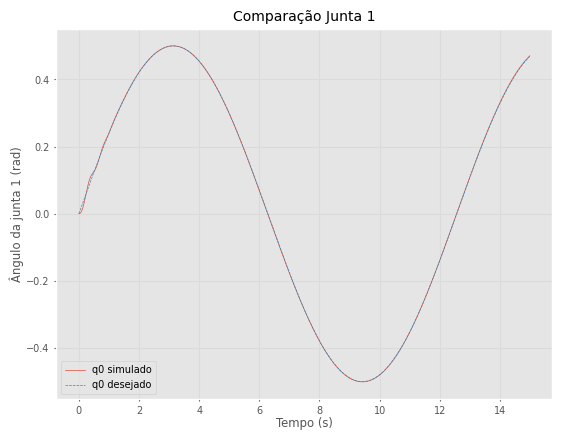

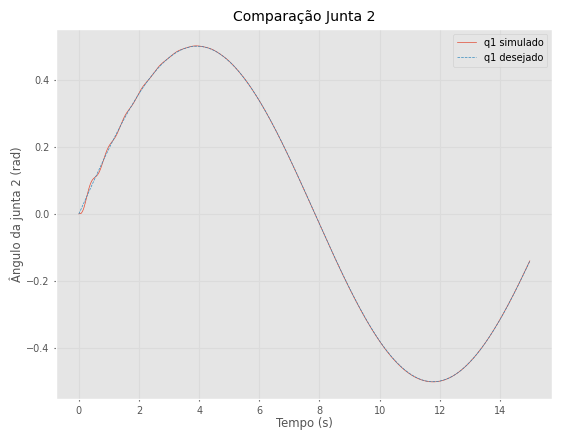

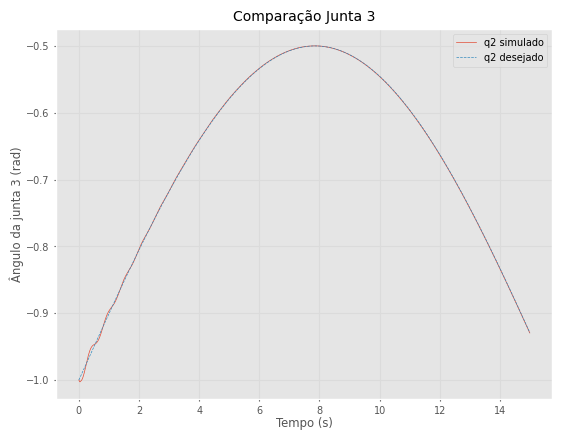

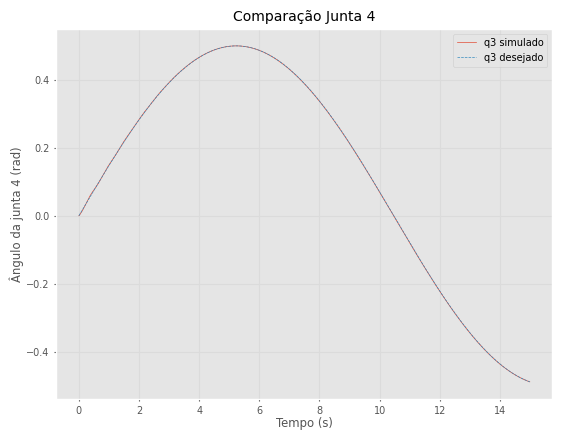

In [5]:
from matplotlib import pyplot as plt

gains = result.x

log = run_simulation(15.0, 0.005, gains, desired_trajectory)

q_ref = np.array([desired_trajectory(t) for t in log["timestamp"]])

for j in range(4):
    plt.figure()
    plt.plot(log["timestamp"], log["q"][:, j], label=f"q{j} simulado")
    plt.plot(log["timestamp"], q_ref[:, j], '--', label=f"q{j} desejado")
    plt.xlabel("Tempo (s)")
    plt.ylabel(f"Ângulo da junta {j+1} (rad)")
    plt.legend()
    plt.title(f"Comparação Junta {j+1}")
    plt.show()

100%|██████████| 3000/3000 [00:12<00:00, 243.33it/s]


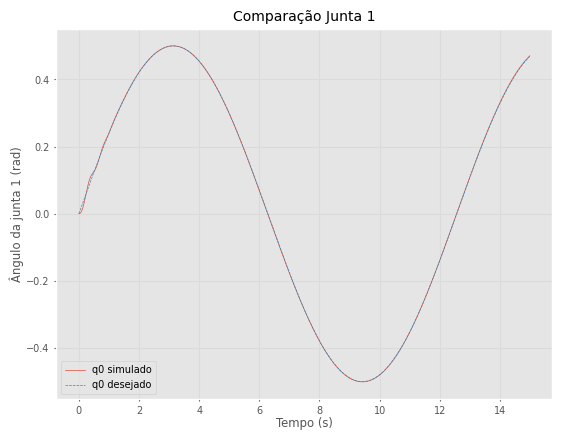

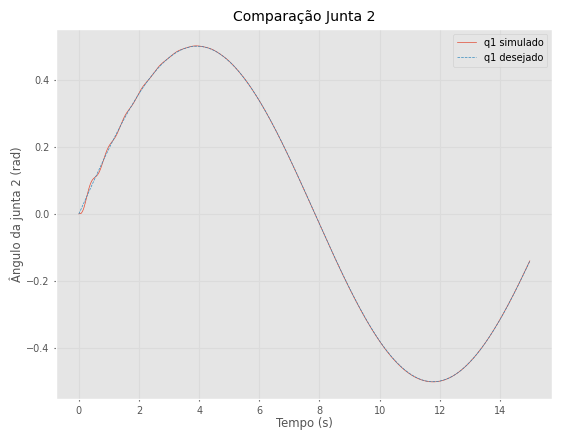

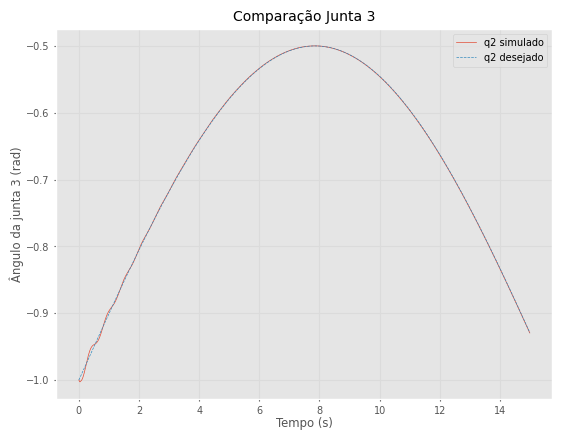

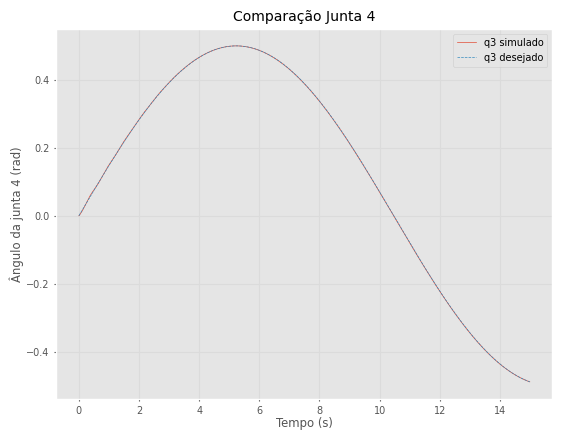

In [6]:
# old gains
old_gains = initial_guess

log_old_gains = run_simulation(15.0, 0.005, old_gains, desired_trajectory)

q_ref = np.array([desired_trajectory(t) for t in log["timestamp"]])

for j in range(4):
    plt.figure()
    plt.plot(log["timestamp"], log["q"][:, j], label=f"q{j} simulado")
    plt.plot(log["timestamp"], q_ref[:, j], '--', label=f"q{j} desejado")
    plt.xlabel("Tempo (s)")
    plt.ylabel(f"Ângulo da junta {j+1} (rad)")
    plt.legend()
    plt.title(f"Comparação Junta {j+1}")
    plt.show()

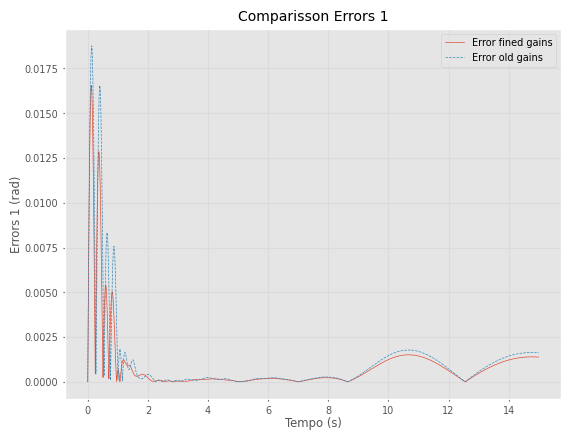

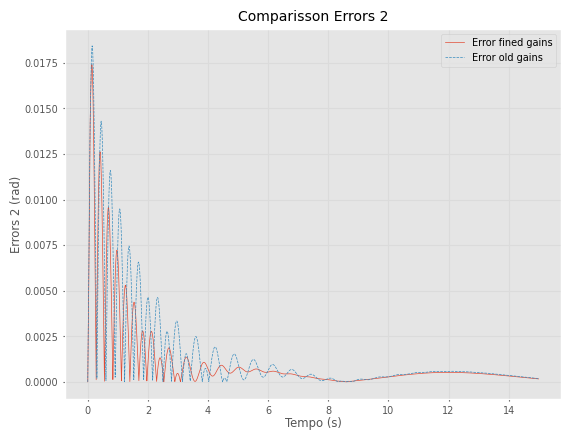

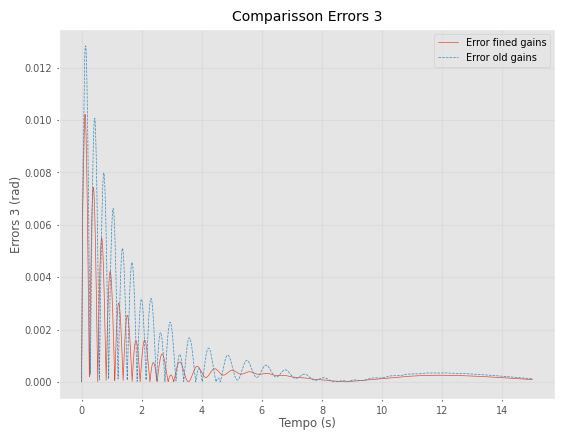

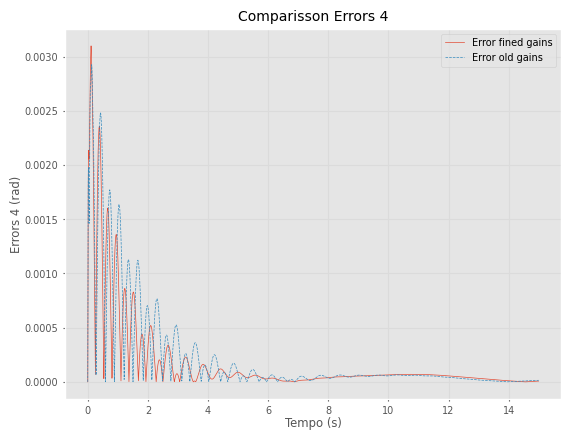

In [7]:
# comparing errors
for j in range(4):
    plt.figure()
    plt.plot(log["timestamp"], np.abs(log["error"][:, j]), label=f"Error fined gains")
    plt.plot(log_old_gains["timestamp"], np.abs(log_old_gains["error"][:, j]), '--', label=f"Error old gains")
    plt.xlabel("Tempo (s)")
    plt.ylabel(f"Errors {j+1} (rad)")
    plt.legend()
    plt.title(f"Comparisson Errors {j+1}")
    plt.show()

In [8]:
abs_erro_old_gain = np.abs(log_old_gains["error"])
abs_erro_refined_gain = np.abs(log["error"])
print("Sum of absolute errors")
print(f"Old gains: {np.sum(abs_erro_old_gain)}")
print(f"Refined gains: {np.sum(abs_erro_refined_gain)}")

Sum of absolute errors
Old gains: 11.517434564748555
Refined gains: 8.392032529123181


In [9]:
# optimize
result_second_iteration = minimize(
    cost_function,
    gains,
    args=(time_s, dt),
    method="Nelder-Mead",
    options={
        'maxiter': 50,
        'xatol': 1e-5,
        'fatol': 1e-5,
        'disp': True,
        'adaptive': True
    }
)

100%|██████████| 1000/1000 [00:04<00:00, 227.37it/s]


Iteration 226
Cost 0.029832653106564067
Gains [2.40249327e+03 8.14670336e+03 1.22248088e+04 1.99863325e+04
 7.14420479e+01 1.75319094e+02 4.76970495e+01 5.55299273e-04
 9.89517318e-04 9.43497882e-04 8.89973261e-04 5.89187648e+03]
------------------------------------------


100%|██████████| 1000/1000 [00:04<00:00, 226.72it/s]

Iteration 227
Cost 0.029634897064216414
Gains [2.42546949e+03 8.14028079e+03 1.22690767e+04 1.99268404e+04
 7.13473580e+01 1.76258937e+02 4.77135702e+01 5.55385357e-04
 9.84752097e-04 9.38973701e-04 8.86627296e-04 5.87867781e+03]
------------------------------------------



/tmp/ipykernel_1964998/1923195351.py:2: RuntimeWarning: Maximum number of iterations has been exceeded.
  result_second_iteration = minimize(


In [15]:
print("Nelder-Mead second iteration gains")
print(result_second_iteration.x)

Nelder-Mead second iteration gains
[ 2.42546949e+03  8.14028079e+03  1.22690767e+04  1.99268404e+04
  7.13473580e+01  1.76258937e+02  4.77135702e+01 -5.55385357e-04
 -9.84752097e-04 -9.38973701e-04 -8.86627296e-04  5.87867781e+03]


100%|██████████| 3000/3000 [00:12<00:00, 248.05it/s]


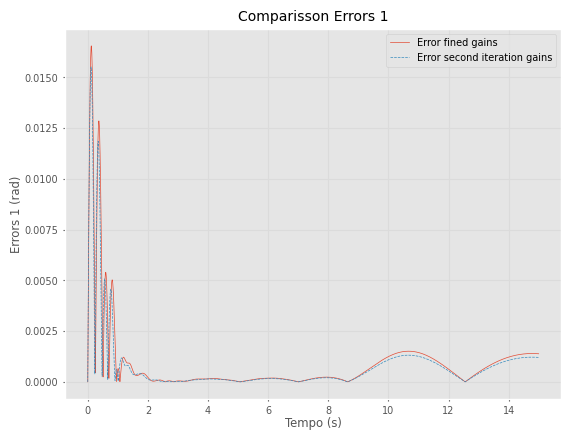

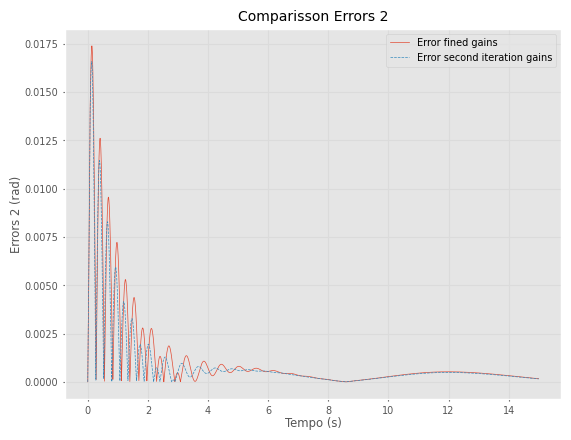

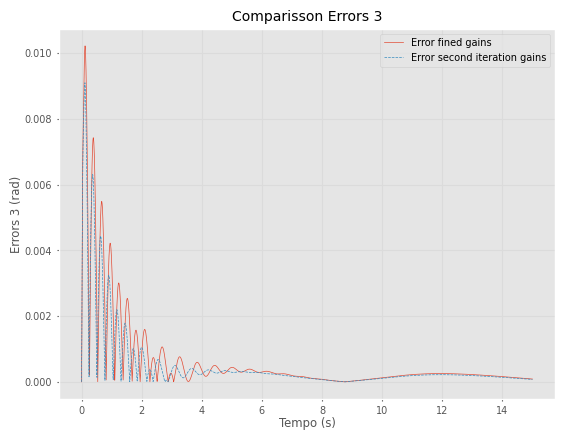

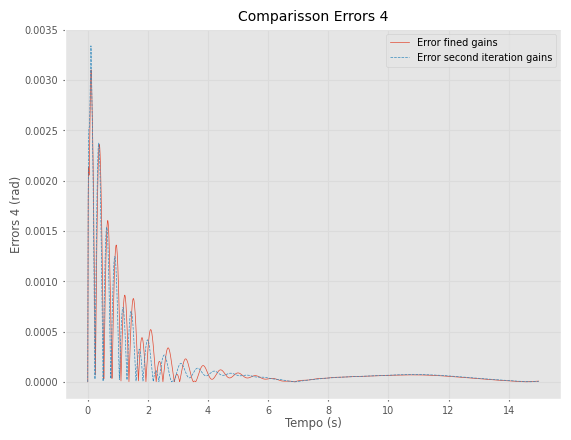

In [12]:
# old gains
second_iteration_gains = result_second_iteration.x

log_second_iteration = run_simulation(15.0, 0.005, second_iteration_gains, desired_trajectory)

# comparing errors
for j in range(4):
    plt.figure()
    plt.plot(log["timestamp"], np.abs(log["error"][:, j]), label=f"Error fined gains")
    plt.plot(log_second_iteration["timestamp"], np.abs(log_second_iteration["error"][:, j]), '--', label=f"Error second iteration gains")
    plt.xlabel("Tempo (s)")
    plt.ylabel(f"Errors {j+1} (rad)")
    plt.legend()
    plt.title(f"Comparisson Errors {j+1}")
    plt.show()

In [13]:
abs_erro_old_gain = np.abs(log_old_gains["error"])
abs_erro_refined_gain = np.abs(log["error"])
abs_error_second_iteration = np.abs(log_second_iteration["error"])
print("Sum of absolute errors")
print(f"Old gains: {np.sum(abs_erro_old_gain)}")
print(f"Refined gains: {np.sum(abs_erro_refined_gain)}")
print(f"Second Iteration: {np.sum(abs_error_second_iteration)}")

Sum of absolute errors
Old gains: 11.517434564748555
Refined gains: 8.392032529123181
Second Iteration: 7.128665370108896


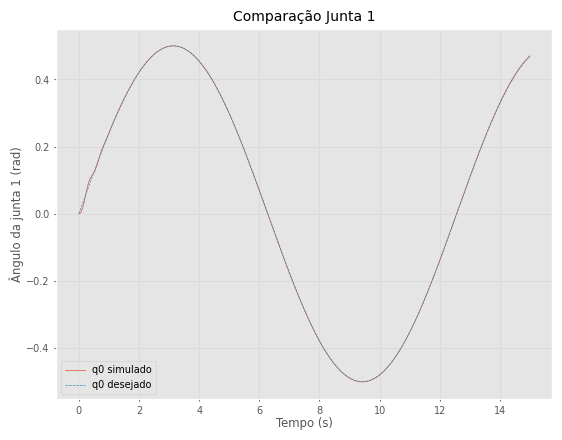

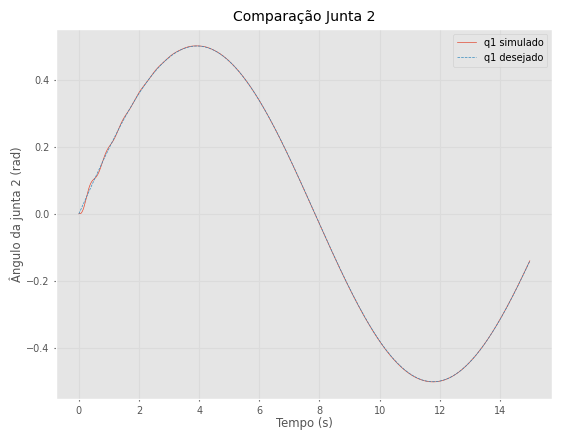

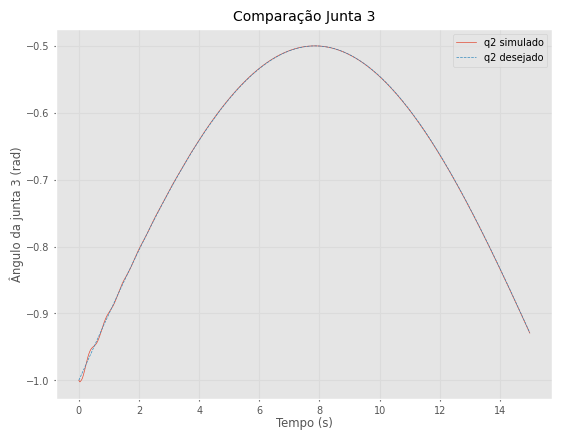

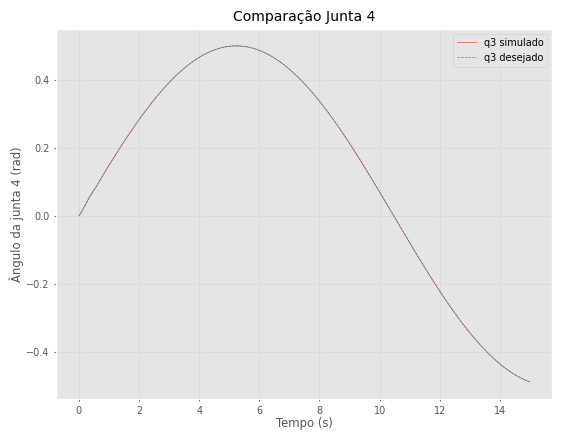

In [14]:
for j in range(4):
    plt.figure()
    plt.plot(log_second_iteration["timestamp"], log_second_iteration["q"][:, j], label=f"q{j} simulado")
    plt.plot(log_second_iteration["timestamp"], q_ref[:, j], '--', label=f"q{j} desejado")
    plt.xlabel("Tempo (s)")
    plt.ylabel(f"Ângulo da junta {j+1} (rad)")
    plt.legend()
    plt.title(f"Comparação Junta {j+1}")
    plt.show()